In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [37]:
df = pd.read_csv("country_wise_latest.csv")

df.isna().sum()



Country/Region            0
Confirmed                 0
Deaths                    0
Recovered                 0
Active                    0
New cases                 0
New deaths                0
New recovered             0
Deaths / 100 Cases        0
Recovered / 100 Cases     0
Deaths / 100 Recovered    0
Confirmed last week       0
1 week change             0
1 week % increase         0
WHO Region                0
dtype: int64

In [36]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
 14  WHO Region              187 non-null    ob

In [29]:

mean_confirmed = df['Confirmed'].mean()
median_confirmed = df['Confirmed'].median()
mode_confirmed = df['Confirmed'].mode()
mode_confirmed_list = mode_confirmed.tolist()

print(f"For confirmed : Mean : {mean_confirmed} , Median : {median_confirmed} , Mode : {mode_confirmed_list}")

For confirmed : Mean : 88130.935828877 , Median : 5059.0 , Mode : [24, 86, 10621]


In [38]:
mean_deaths = df['Deaths'].mean()
median_deaths = df['Deaths'].median()
mode_deaths = df['Deaths'].mode()

print(f"For Deaths : Mean : {mean_deaths} , Median : {median_deaths} , Mode : {mode_deaths}")

For Deaths : Mean : 3497.51871657754 , Median : 108.0 , Mode : 0    0
Name: Deaths, dtype: int64


In [42]:
variance_confirmed = df['Confirmed'].var()
std_confirmed = df['Confirmed'].std()


print(f"For Confirmed : Variance : {variance_confirmed} , Standard Deviation : {std_confirmed}")

For Confirmed : Variance : 146933198040.88834 , Standard Deviation : 383318.6638306154


In [44]:
variance_deaths= df['Deaths'].var()
std_deaths = df['Deaths'].std()


print(f"For Deaths : Variance : {variance_deaths} , Standard Deviation : {std_deaths}")

For Deaths : Variance : 198810069.99292743 , Standard Deviation : 14100.002482018484


           Confirmed    Deaths  Recovered
Confirmed   1.000000  0.934698   0.906377
Deaths      0.934698  1.000000   0.832098
Recovered   0.906377  0.832098   1.000000


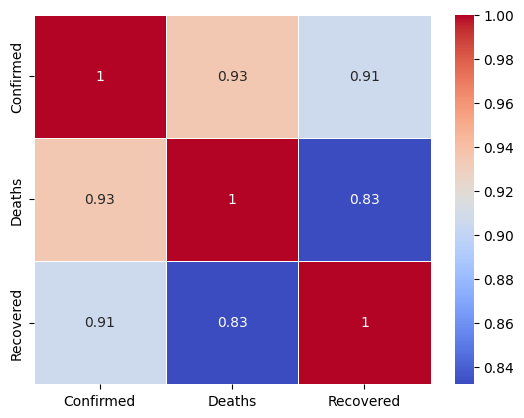

In [52]:

correlation_matrix = df[['Confirmed' , 'Deaths' , 'Recovered']].corr()
print(correlation_matrix)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()


In [55]:
prob_confirmed_above_1000 = len(df[df['Confirmed'] > 1000]) / len(df)

print(f"Probability of confirmed cases > 1000: {prob_confirmed_above_1000}")

Probability of confirmed cases > 1000: 0.7593582887700535


In [63]:
confirmed_above_1000 = df[df['Confirmed'] > 1000]
conditional_prob = len(confirmed_above_1000[confirmed_above_1000['Deaths'] > 0]) / len(confirmed_above_1000)
print(f"Conditional Probability of deaths given cases > 1000: {conditional_prob}")

Conditional Probability of deaths given cases > 1000: 1.0


In [67]:
confirmed_vector = np.array(df['Confirmed'])
deaths_vector = np.array(df['Deaths'])

dot_product = np.dot(confirmed_vector , deaths_vector)

print(f"Dot Product of confirmed cases and deaths: {dot_product}")


Dot Product of confirmed cases and deaths: 997285387205


In [72]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[['Confirmed', 'Deaths']])

print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


Explained Variance Ratio: [9.99829488e-01 1.70511988e-04]


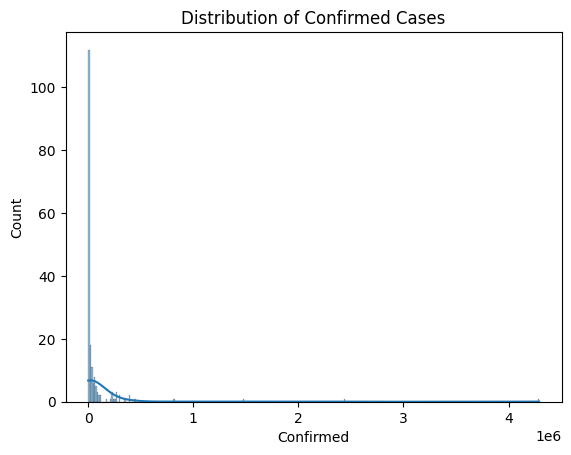

In [74]:
sns.histplot(df['Confirmed'] , kde=True)
plt.title("Distribution of Confirmed Cases")

plt.show()

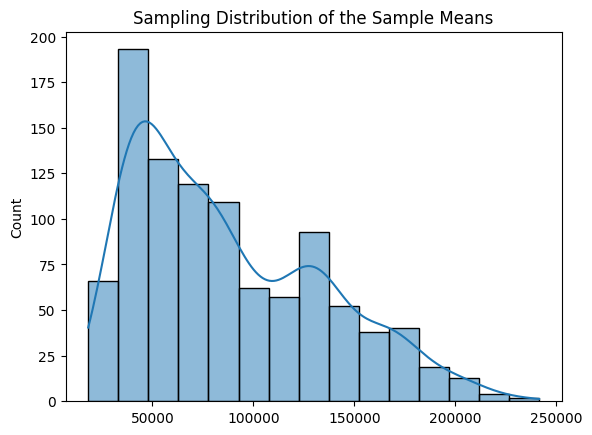

In [75]:
sample_means = [df['Confirmed'].sample(50).mean() for i in range(1000)]

sns.histplot(sample_means, kde=True)
plt.title("Sampling Distribution of the Sample Means")
plt.show()